In [18]:
%matplotlib inline
from matplotlib import pyplot as plt

In [55]:
import numpy as np
import cv2
import time
from utils import VideoReader
from opendr.perception.object_detection_2d.ssd.ssd_learner import SingleShotDetectorLearner
from opendr.perception.object_detection_2d.utils.vis_utils import draw_bounding_boxes


In [4]:
ssd = SingleShotDetectorLearner(device='cuda')
ssd.download(".", mode="pretrained")
ssd.load("./ssd_default_person", verbose=True)

[12:54:41] ../src/base.cc:80: cuDNN lib mismatch: linked-against version 8101 != compiled-against version 8100.  Set MXNET_CUDNN_LIB_CHECKING=0 to quiet this warning.
[12:54:46] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)


Model name: ssd_default_person --> ./ssd_default_person/ssd_default_person.json
Loaded parameters and metadata.


True

In [7]:
image_provider = VideoReader(0)
for counter, img in enumerate(image_provider):
    boxes = ssd.infer(img, threshold=0.6)

    draw_bounding_boxes(img, boxes, class_names=ssd.classes, show=False)
    
    cv2.imshow('Result', img)
    if cv2.waitKey(1) == ord('q'):
        break
    
cv2.destroyAllWindows()
image_provider.close()

In [8]:
from opendr.perception.object_detection_2d.retinaface.retinaface_learner import RetinaFaceLearner

In [9]:
learner = RetinaFaceLearner(backbone='resnet', device='cuda')
learner.download(".", mode="pretrained")
learner.load("./retinaface_resnet")

Loading model from path:  ./retinaface_resnet/retinaface_resnet
Loaded mxnet model.


In [10]:
image_provider = VideoReader(0)


In [11]:
for counter, img in enumerate(image_provider):
    fps_counter.tic()
    boxes = learner.infer(img, threshold=0.6)
    fps_counter.toc(img)

    draw_bounding_boxes(img, boxes, class_names=learner.classes, show=False)
    
    cv2.imshow('Result', img)
    if cv2.waitKey(1) == ord('q'):
        break
    
cv2.destroyAllWindows()
image_provider.close()

[12:57:51] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:97: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)


Grab a face image and save it for later

In [23]:
image_provider = iter(VideoReader(0))
img = next(image_provider)
image_provider.close()

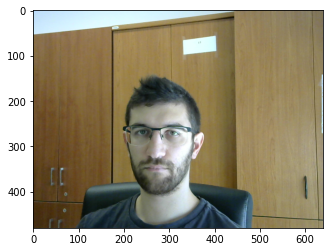

In [24]:
plt.imshow(img[:, :, [2, 1, 0]])

In [56]:
boxes = learner.infer(img, threshold=0.6)

from opendr.perception.object_detection_2d.datasets.transforms import BoundingBoxListToNumpyArray

# Crop image
bbox = BoundingBoxListToNumpyArray()(boxes)[0][:4].astype(np.int)
print(bbox)
face_img = img[bbox[1]:bbox[3],bbox[0]:bbox[2], :]

[212 201 346 395]


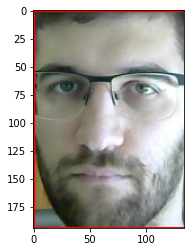

In [57]:
plt.imshow(face_img[:, :, [2, 1, 0]])

In [61]:
!mkdir -p persons/me
cv2.imwrite('persons/me/1.jpg', face_img)

True